In [7]:
import arff
import numpy as np
import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv('df.csv', encoding='utf-8')
df1.head()

,Unnamed: 0,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,class
0,0,liveturn_0,0.0125,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,...,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848,0.0
1,1,liveturn_0,0.0125,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,...,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777,0.0
2,2,liveturn_0,0.0125,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,...,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269,0.0
3,3,liveturn_0,0.0125,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,...,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453,0.0
4,4,liveturn_0,0.0125,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,...,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127,0.0


In [3]:
y = df1['class']

In [4]:
df = df1.drop(['class', 'Unnamed: 0', 'name', 'frameTime', 'F0_sma_min', 'F0env_sma_minPos'], axis=1)
df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,1.749059e-07,3.226129e-07,2.786802e-13,...,40.03075,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848
1,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,1.067552e-05,9.873559e-06,1.916103e-10,...,40.60280,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777
2,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,1.181600e-06,7.439365e-07,1.100044e-12,...,121.68250,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269
3,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,4.778168e-06,2.955321e-06,5.902146e-11,...,43.28719,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453
4,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,2.210803e-06,1.461222e-06,5.422089e-12,...,41.56385,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127


In [5]:
df2 = df.drop(df.columns[:449], axis=1).drop(df.columns[501:949], axis=1)

In [8]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2, y, test_size=0.18, random_state=42)

In [9]:
clf = RandomForestClassifier(n_estimators=250, max_depth=10,
                             random_state=0)

In [11]:
svm2_pipeline = make_pipeline(StandardScaler(), PCA(n_components=70), svm.SVC(kernel='poly', degree=2) )
svm2_pipeline.fit(X2_train, y2_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=70, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [12]:
clf.fit(X2_train, y2_train)
print(accuracy_score(y2_test, clf.predict(X2_test)))
print(accuracy_score(y2_test, svm2_pipeline.predict(X2_test)))

0.8651960784313726
0.8284313725490197


Index(['F0_sma_iqr2-3', 'F0env_sma_quartile2', 'F0env_sma_quartile3',
       'F0_sma_quartile3', 'F0env_sma_de_amean', 'F0env_sma_iqr1-2',
       'F0_sma_quartile2', 'voiceProb_sma_quartile3', 'voiceProb_sma_iqr2-3',
       'F0env_sma_linregc1', 'F0_sma_iqr1-3'],
      dtype='object')


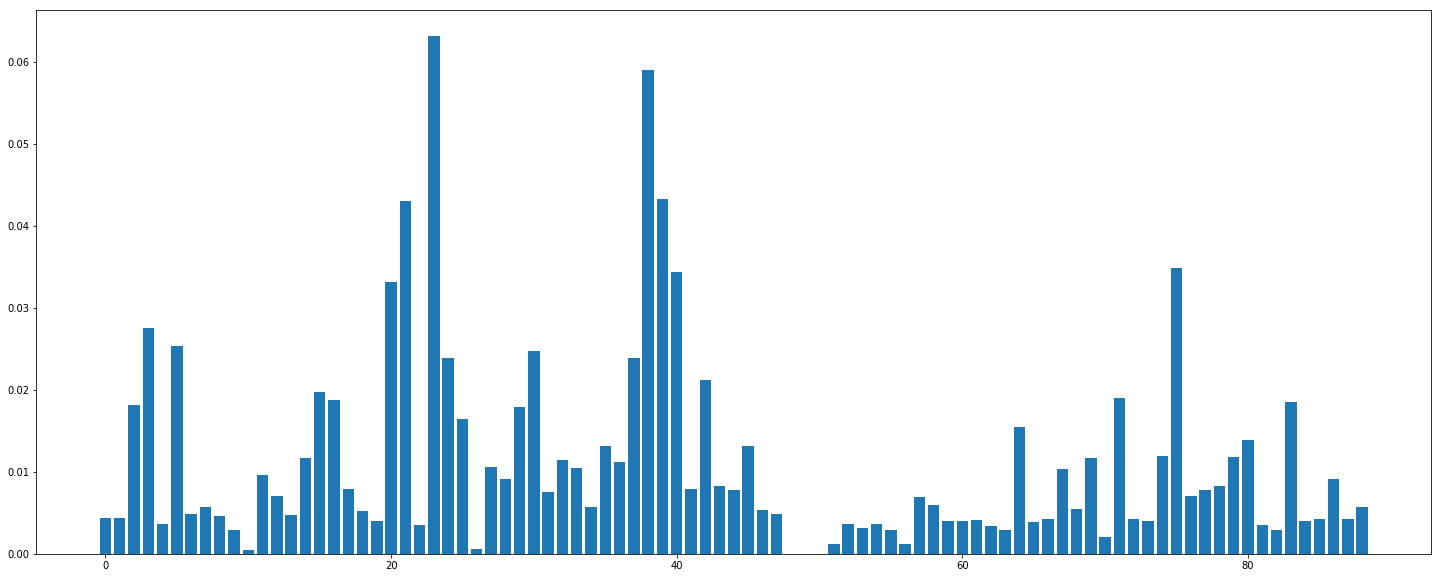

In [14]:
top_X2 = clf.feature_importances_
ind = np.argsort(top_X2)[::-1]
top_10_X2 = df2.columns[ind][0:11]
print(top_10_X2)
plt.figure(figsize=(25, 10))
plt.bar(ind, top_X2[ind])
plt.show()

In [15]:
s = X2_train[top_10_X2]
s['class'] = y2_train
s.head()

/home/veerlosar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,F0_sma_iqr2-3,F0env_sma_quartile2,F0env_sma_quartile3,F0_sma_quartile3,F0env_sma_de_amean,F0env_sma_iqr1-2,F0_sma_quartile2,voiceProb_sma_quartile3,voiceProb_sma_iqr2-3,F0env_sma_linregc1,F0_sma_iqr1-3,class
1476,31.59517,286.9417,362.0038,276.7936,0.986652,20.98578,245.1984,0.855835,0.225942,-0.219965,276.79360,2.0
237,13.55560,247.7784,261.2635,260.1004,1.048258,60.21278,246.5448,0.937394,0.034746,0.442025,95.15146,0.0
913,55.33423,305.6817,343.8187,342.8423,2.314061,50.86247,287.5081,0.945230,0.042025,2.202179,143.90500,1.0
651,7.22757,286.5374,293.3816,290.7738,1.904794,20.53409,283.5462,0.954102,0.012182,0.802594,89.31306,1.0
464,23.59247,237.7016,263.6222,253.1700,0.938213,34.10947,229.5775,0.898443,0.120942,0.661968,253.17000,0.0


/home/veerlosar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/veerlosar/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/veerlosar/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/veerlosar/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

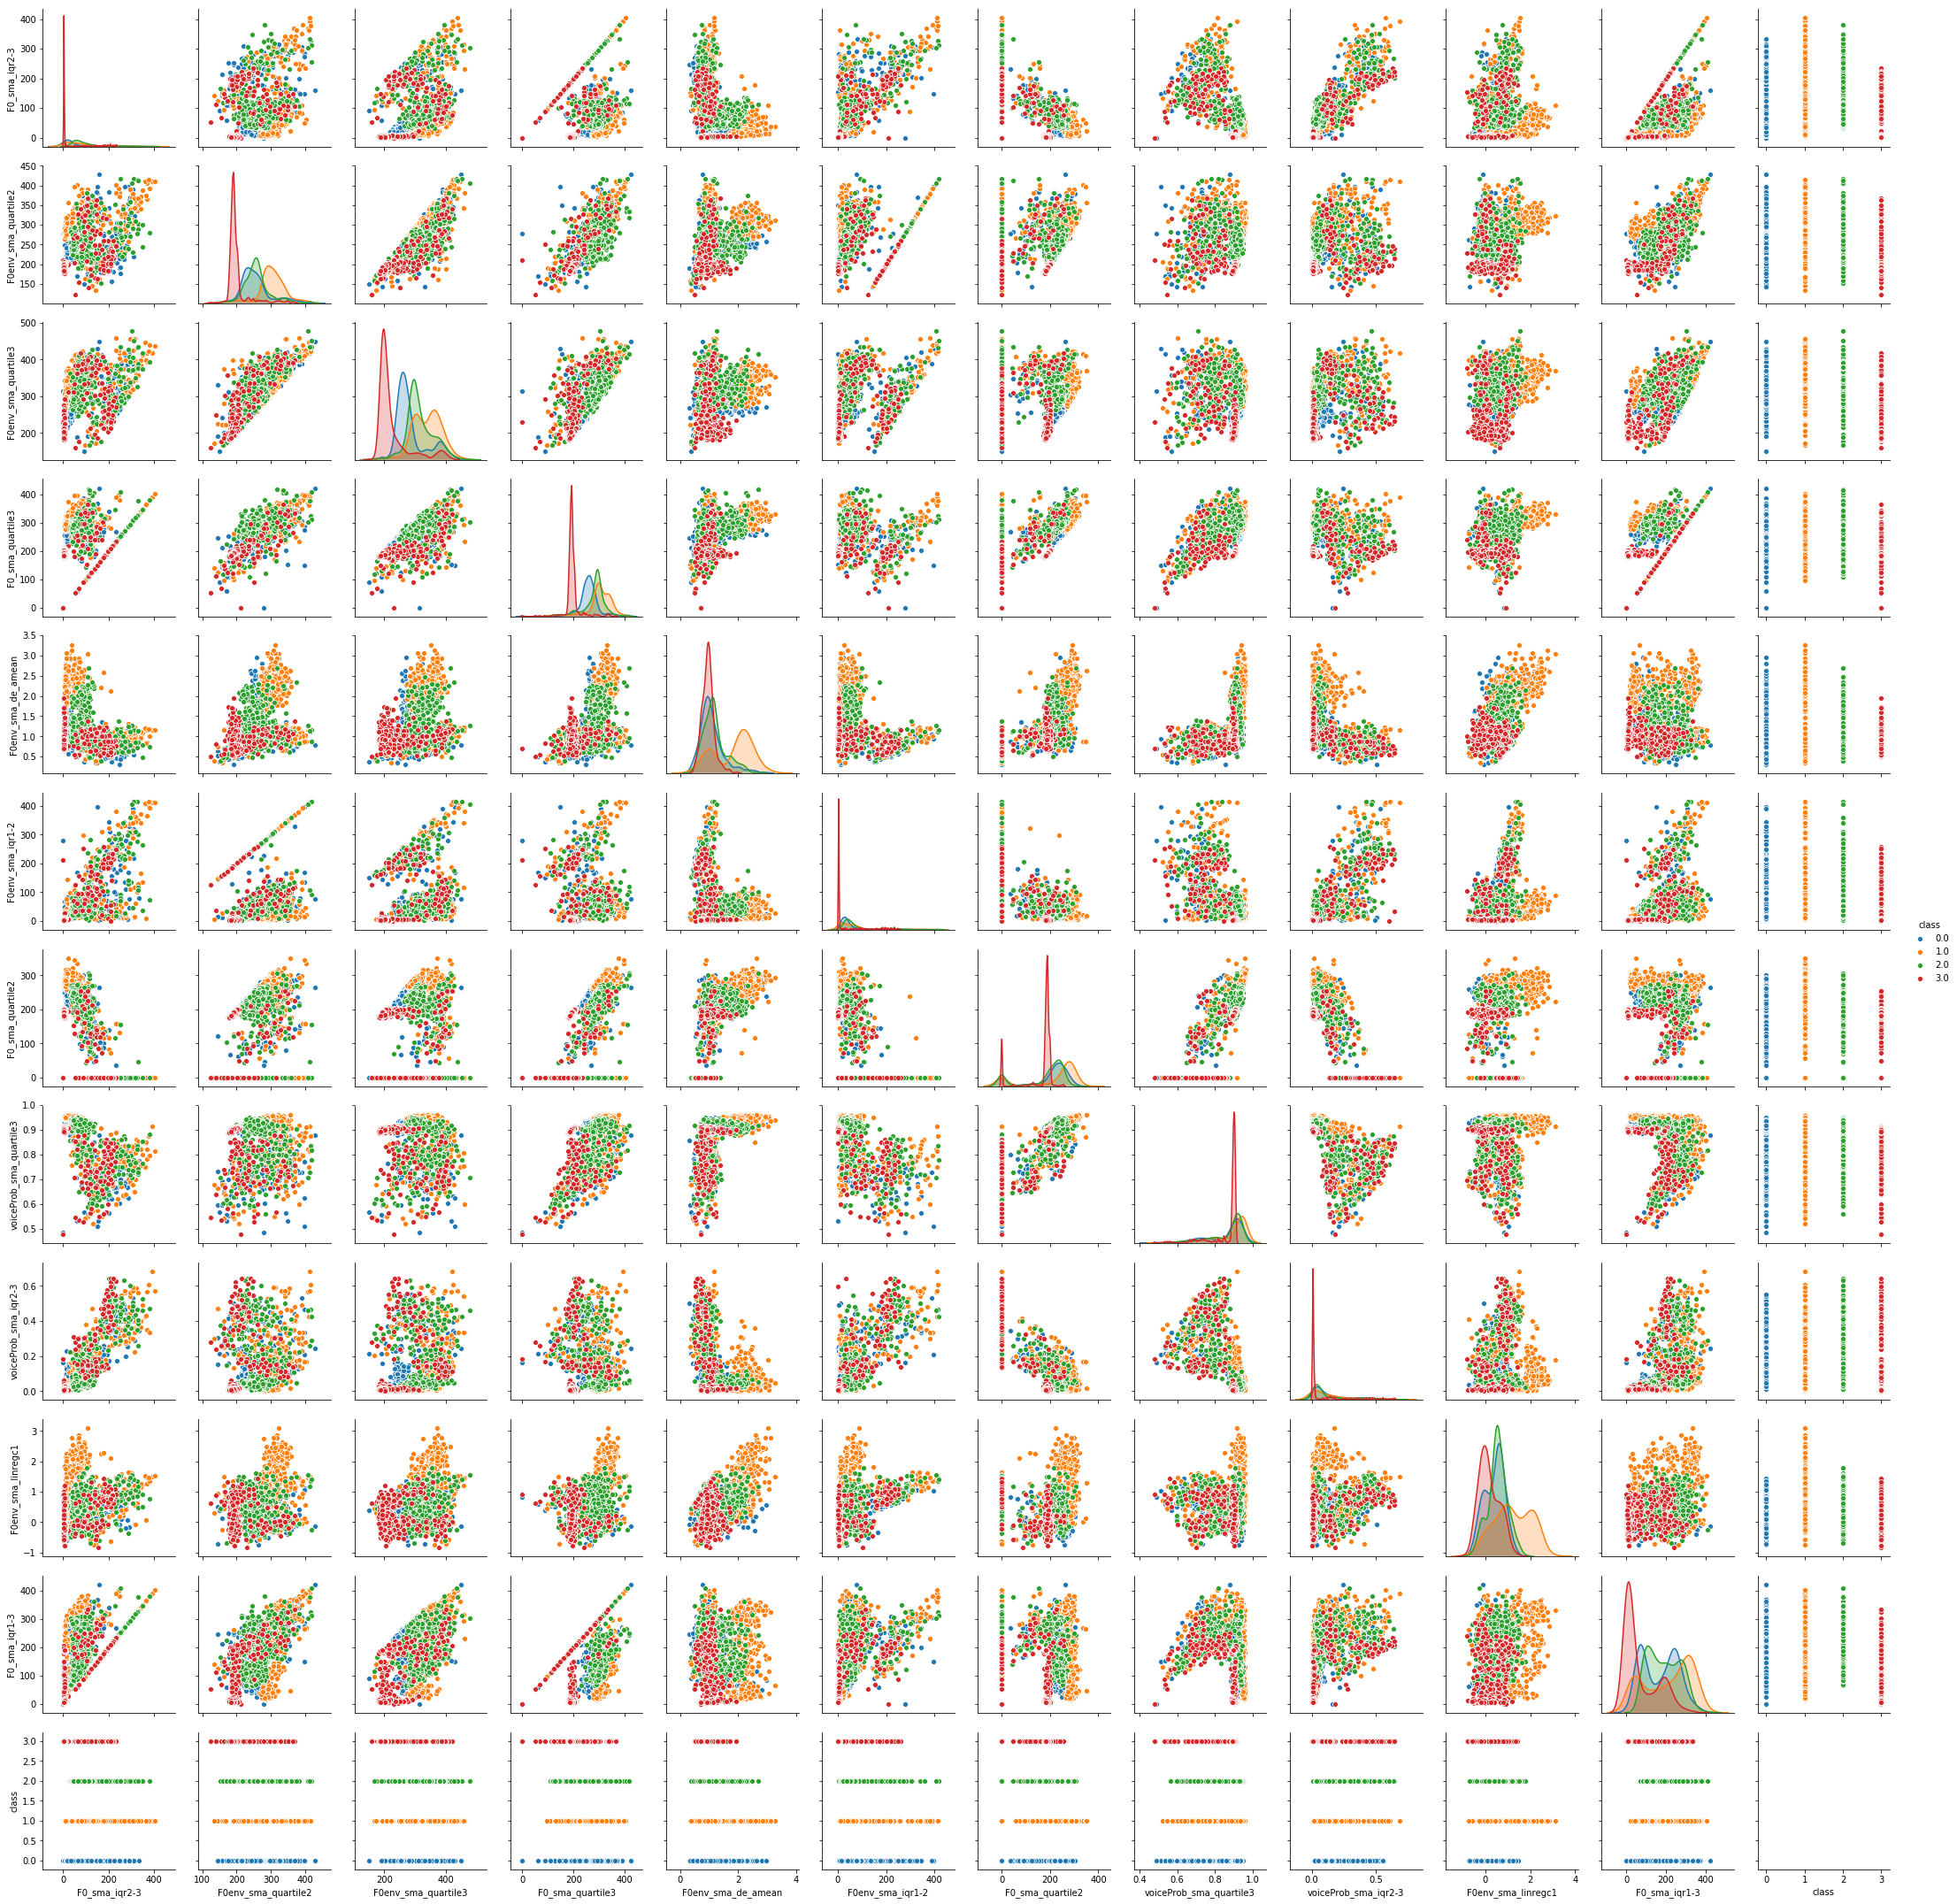

In [16]:
sns.pairplot(s, hue='class')

/home/veerlosar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


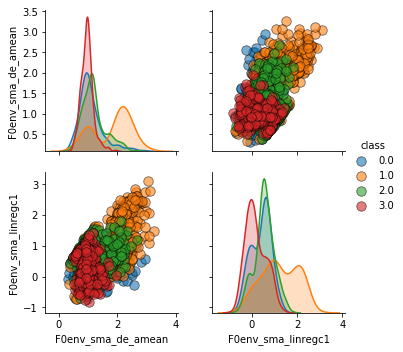

In [17]:
sns.pairplot(s, hue='class', vars=['F0env_sma_de_amean', 'F0env_sma_linregc1'], plot_kws = {'alpha': 0.6, 's': 90, 'edgecolor': 'k'})